In [53]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [54]:
f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_PSDTools/predict_Combine.npz", allow_pickle=True)
dir_events = f["dir_events"].item()
print(dir_events.keys())

dict_keys(['fileid', 'evtID', 'eleID', 'Eqe', 'r3', 'r_xy', 'zz', 'r3_true', 'h_time_without_charge', 'h_time_with_charge', 'tag', 'PSD'])


Text(0.5, 1.0, 'PSD Input')

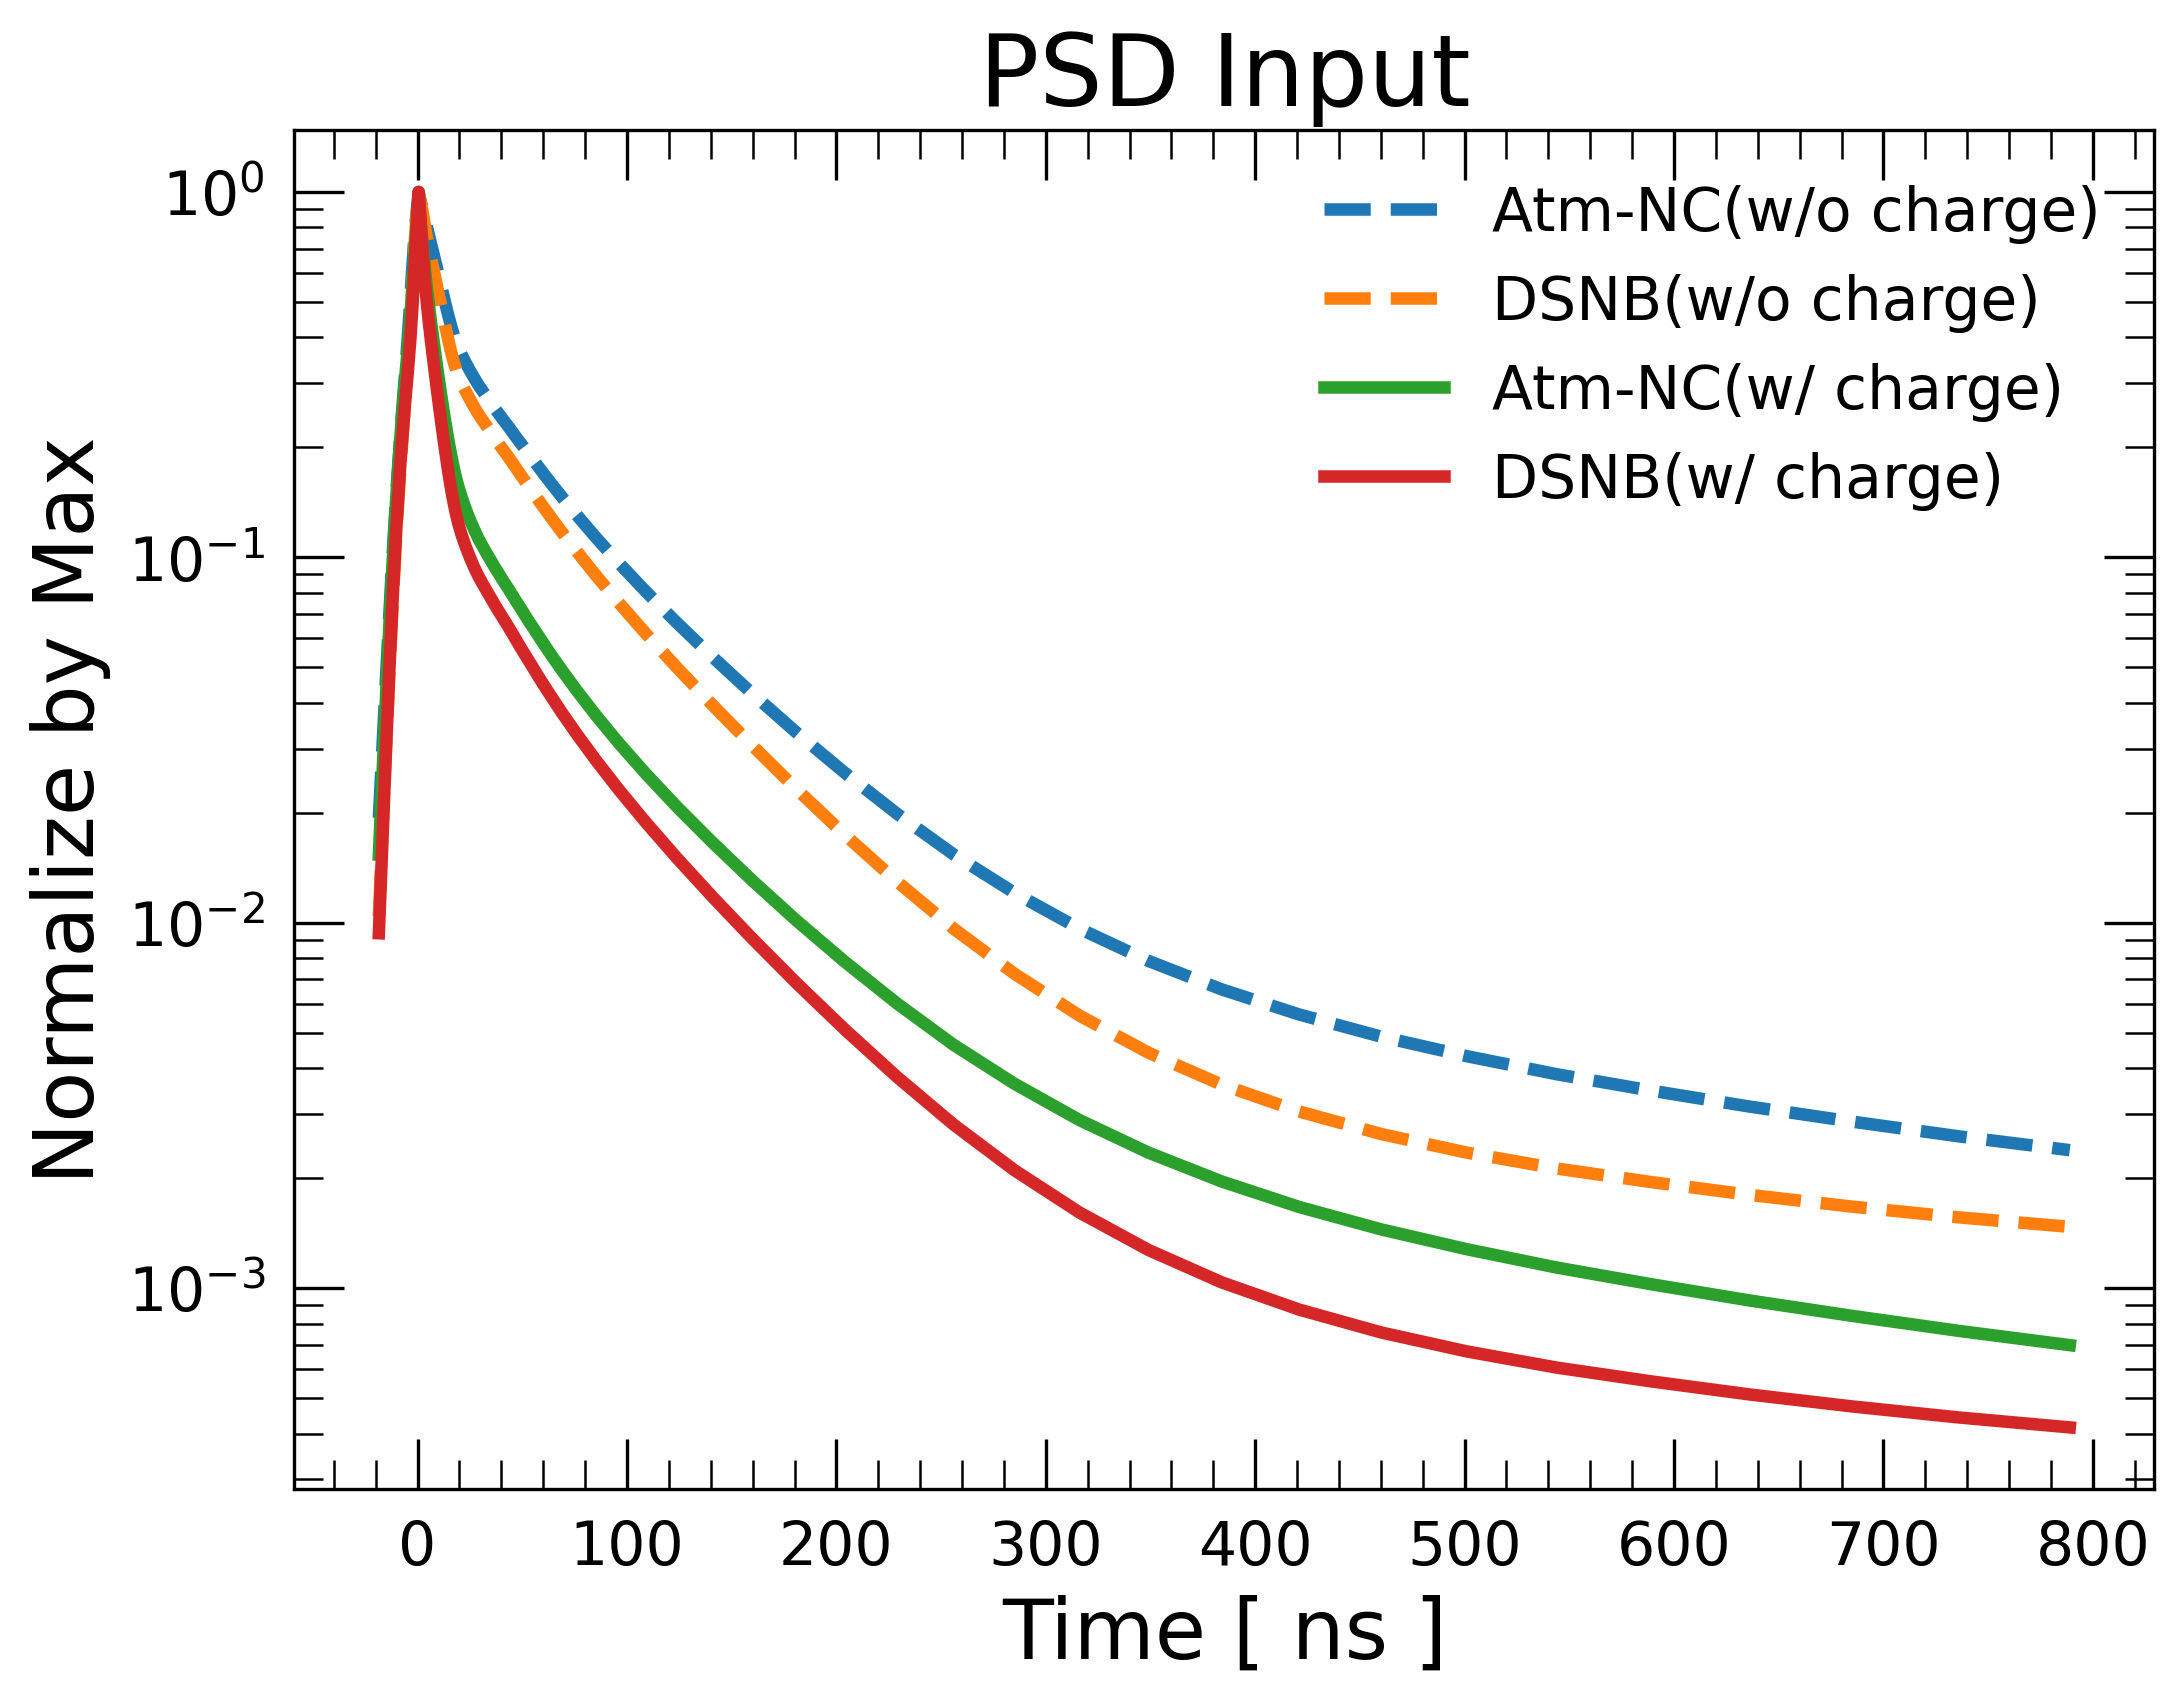

In [55]:
bins = np.array([-19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,
                 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46,
                 48, 50, 52, 54, 56, 58, 60, 62, 66, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
                 402, 440, 480, 522, 566, 612, 660, 710, 762, 816])
from HistTools import GetBinCenter
# print(dir_events["tag"])
dir_h_time_mean = {}

dir_h_time_mean["Atm-NC(w/o charge)"] = np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==0], axis=0)
dir_h_time_mean["DSNB(w/o charge)"] = np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==1], axis=0)

dir_h_time_mean["Atm-NC(w/ charge)"] = np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==0], axis=0)
dir_h_time_mean["DSNB(w/ charge)"] = np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==1], axis=0)

dir_h_time_mean_concat = {}
dir_h_time_mean_concat["Atm-NC"] = np.concatenate((np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==0], axis=0),
                                            np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==0],axis=0),
                                            [np.mean(dir_events["r3"][dir_events["tag"]==0])] ))
dir_h_time_mean_concat["DSNB"] = np.concatenate((np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==1], axis=0),
                                            np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==1],axis=0),
                                            [np.mean(dir_events["r3"][dir_events["tag"]==1])] ))
# print(h_time_atm)
for key, h_time in dir_h_time_mean.items():
    line_style = "--" if "w/o" in key else "-"
    plt.plot(GetBinCenter(bins), h_time/np.diff(bins)/np.max(h_time/np.diff(bins)),label=key,linestyle=line_style)
plt.semilogy()
plt.legend()
plt.xlabel("Time [ ns ]")
plt.ylabel("Normalize by Max")
plt.title("PSD Input")

# Input for sklearn

[-18.5 789. ]


Text(0.5, 1.0, 'PSD Input')

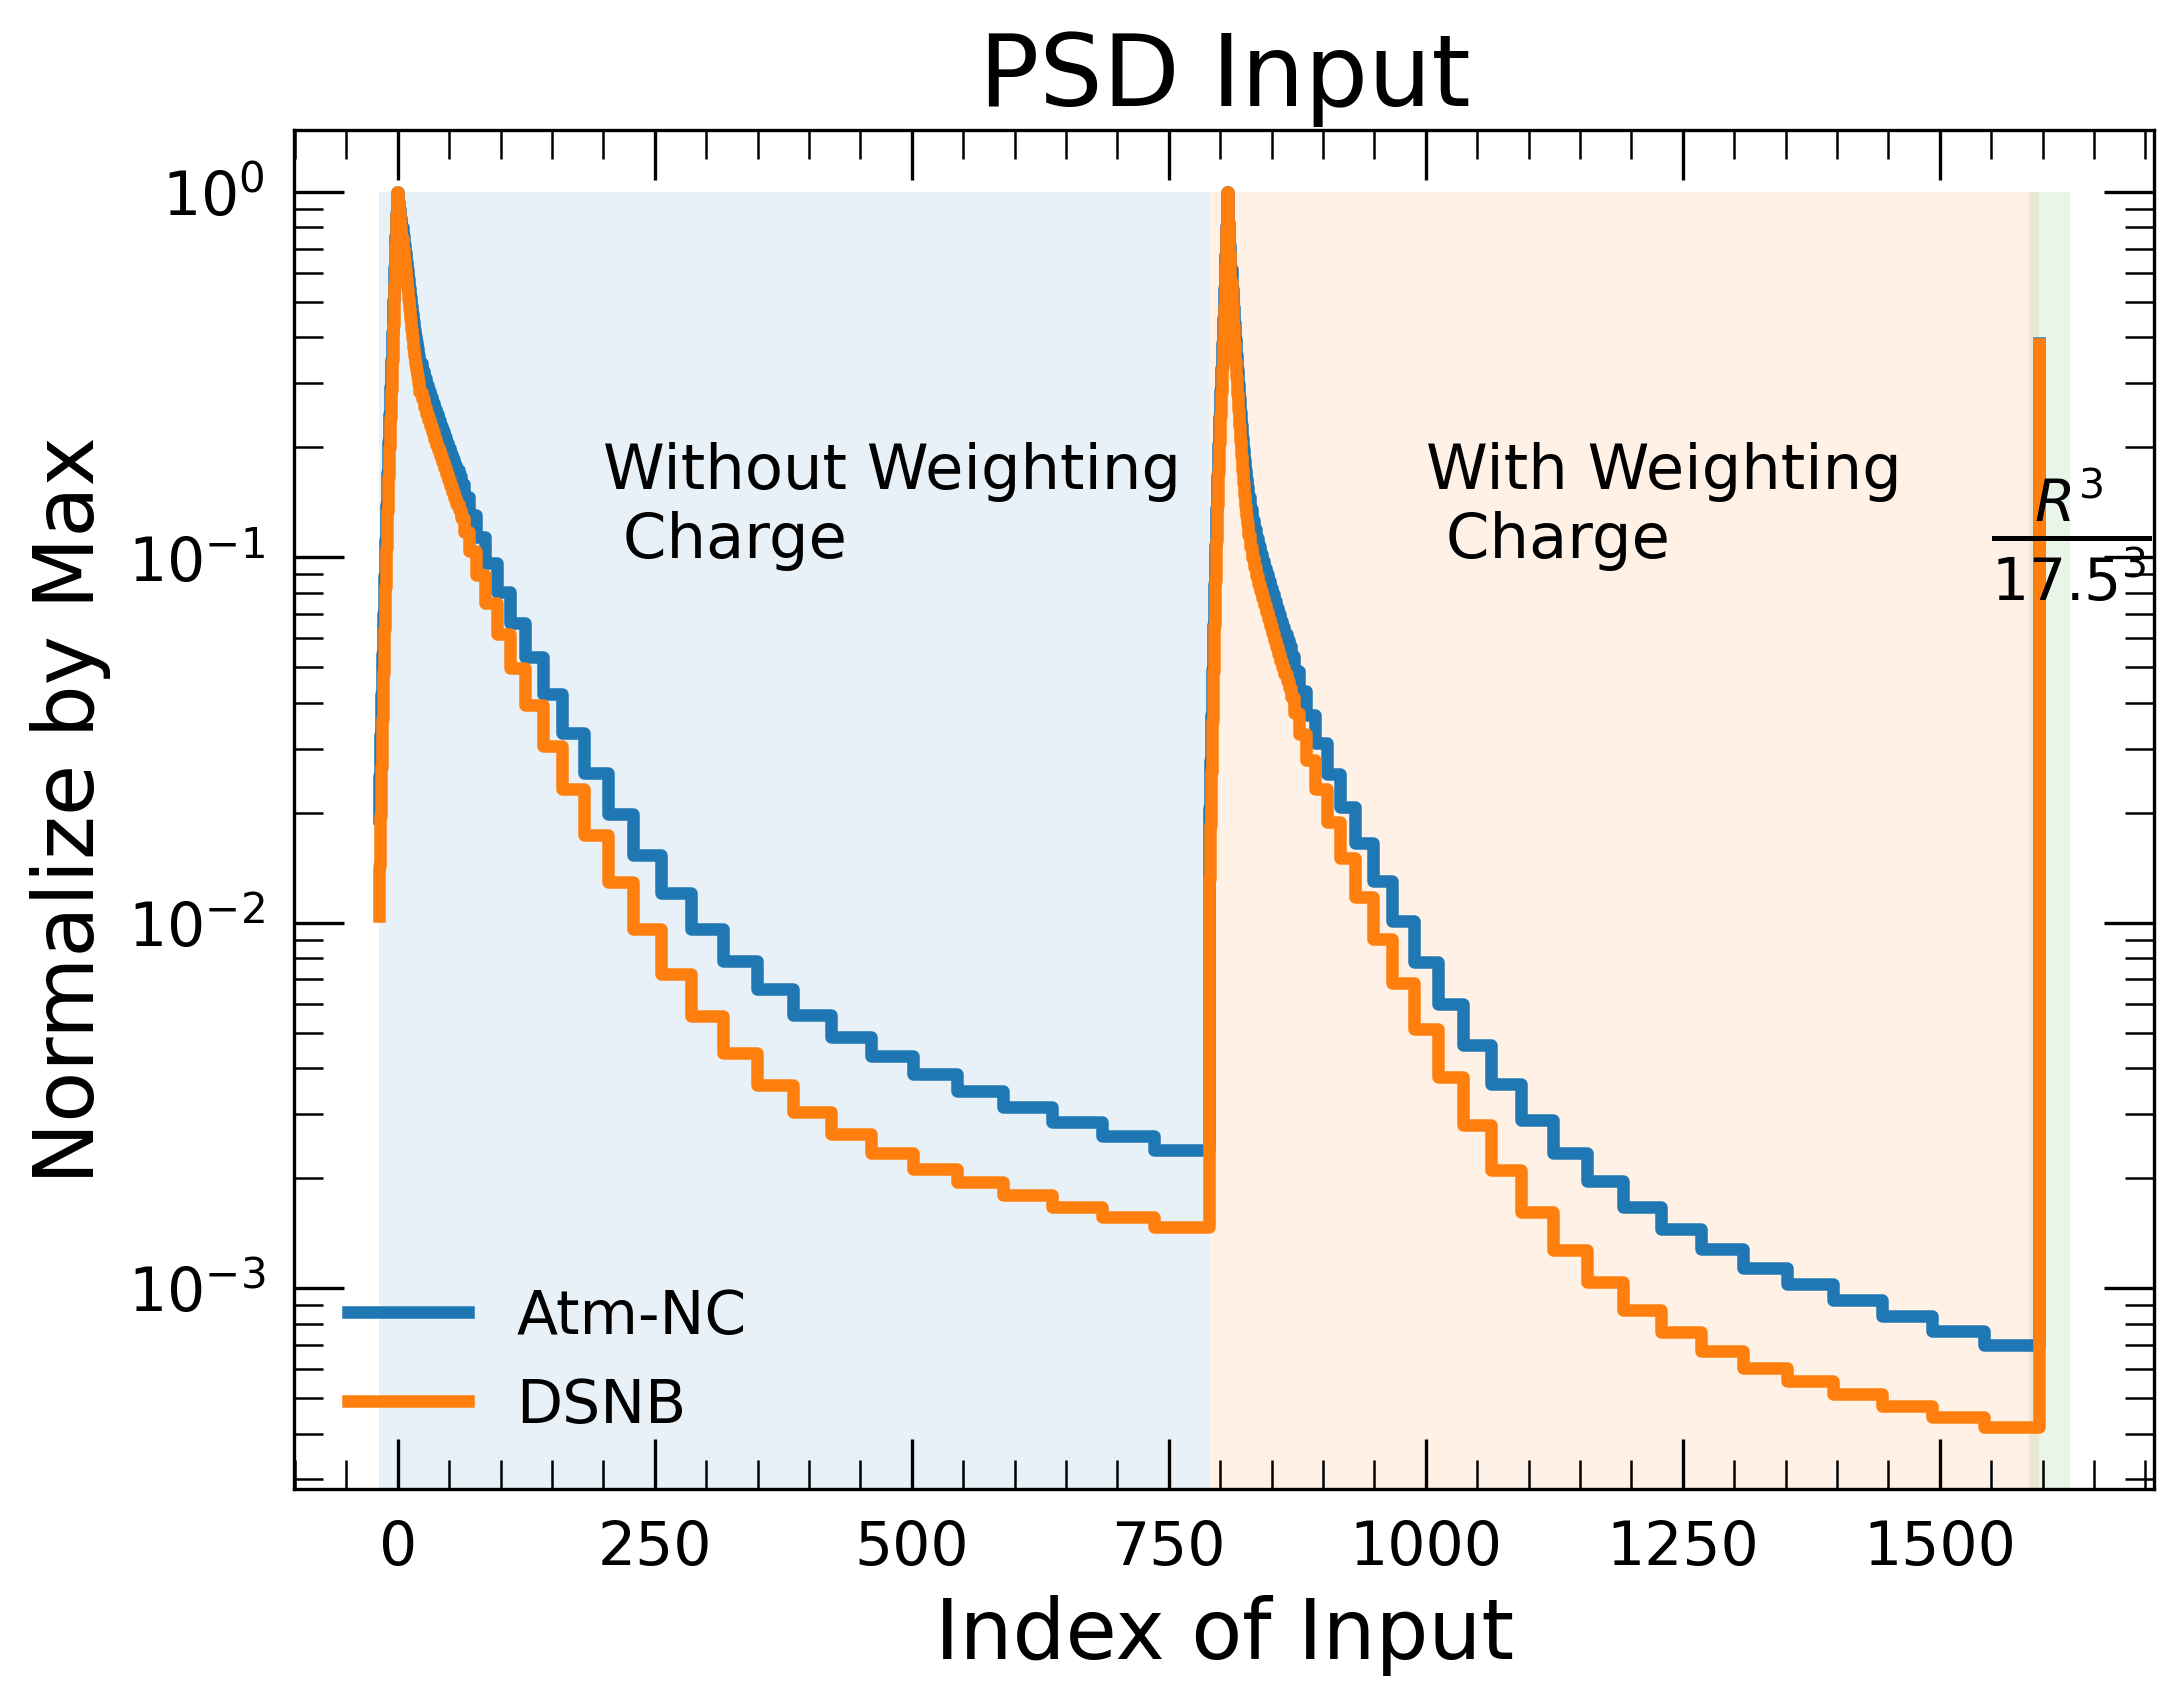

In [56]:
bin_center = GetBinCenter(bins)

for key, h_time in dir_h_time_mean_concat.items():
    v_constant_bin_width = np.concatenate([np.diff(bins)*np.max(h_time[:len(bins)-1]/np.diff(bins) ),
                                           np.diff(bins)*np.max(h_time[len(bins)-1:-1]/np.diff(bins)), [17.5**3]])
    plt.step(np.concatenate([bin_center,bin_center[-1]-bin_center[0]+bin_center, [bin_center[-1]*2-bin_center[0]] ]),
             h_time/v_constant_bin_width,label=key)
    # plt.plot( h_time/v_constant_bin_width,label=key)
plt.fill_between(bin_center[[0, -1]], 1, alpha=0.1)
plt.fill_between((bin_center[-1]-bin_center[0]+bin_center)[[0, -1]], 1, alpha=0.1)
plt.fill_between([bin_center[-1]*2-bin_center[0]-10, bin_center[-1]*2-bin_center[0]+30], 1, alpha=0.1)
plt.text(200, 0.1, "Without Weighting \n Charge",size=15)
plt.text(1000, 0.1, "With Weighting \n Charge",size=15)
plt.text(1550, 0.1, r"$\frac{R^3}{17.5^3}$",size=20)
print(bin_center[[0,-1]])
plt.semilogy()
plt.legend()
plt.xlabel("Index of Input")
plt.ylabel("Normalize by Max")
plt.title("PSD Input")

[]

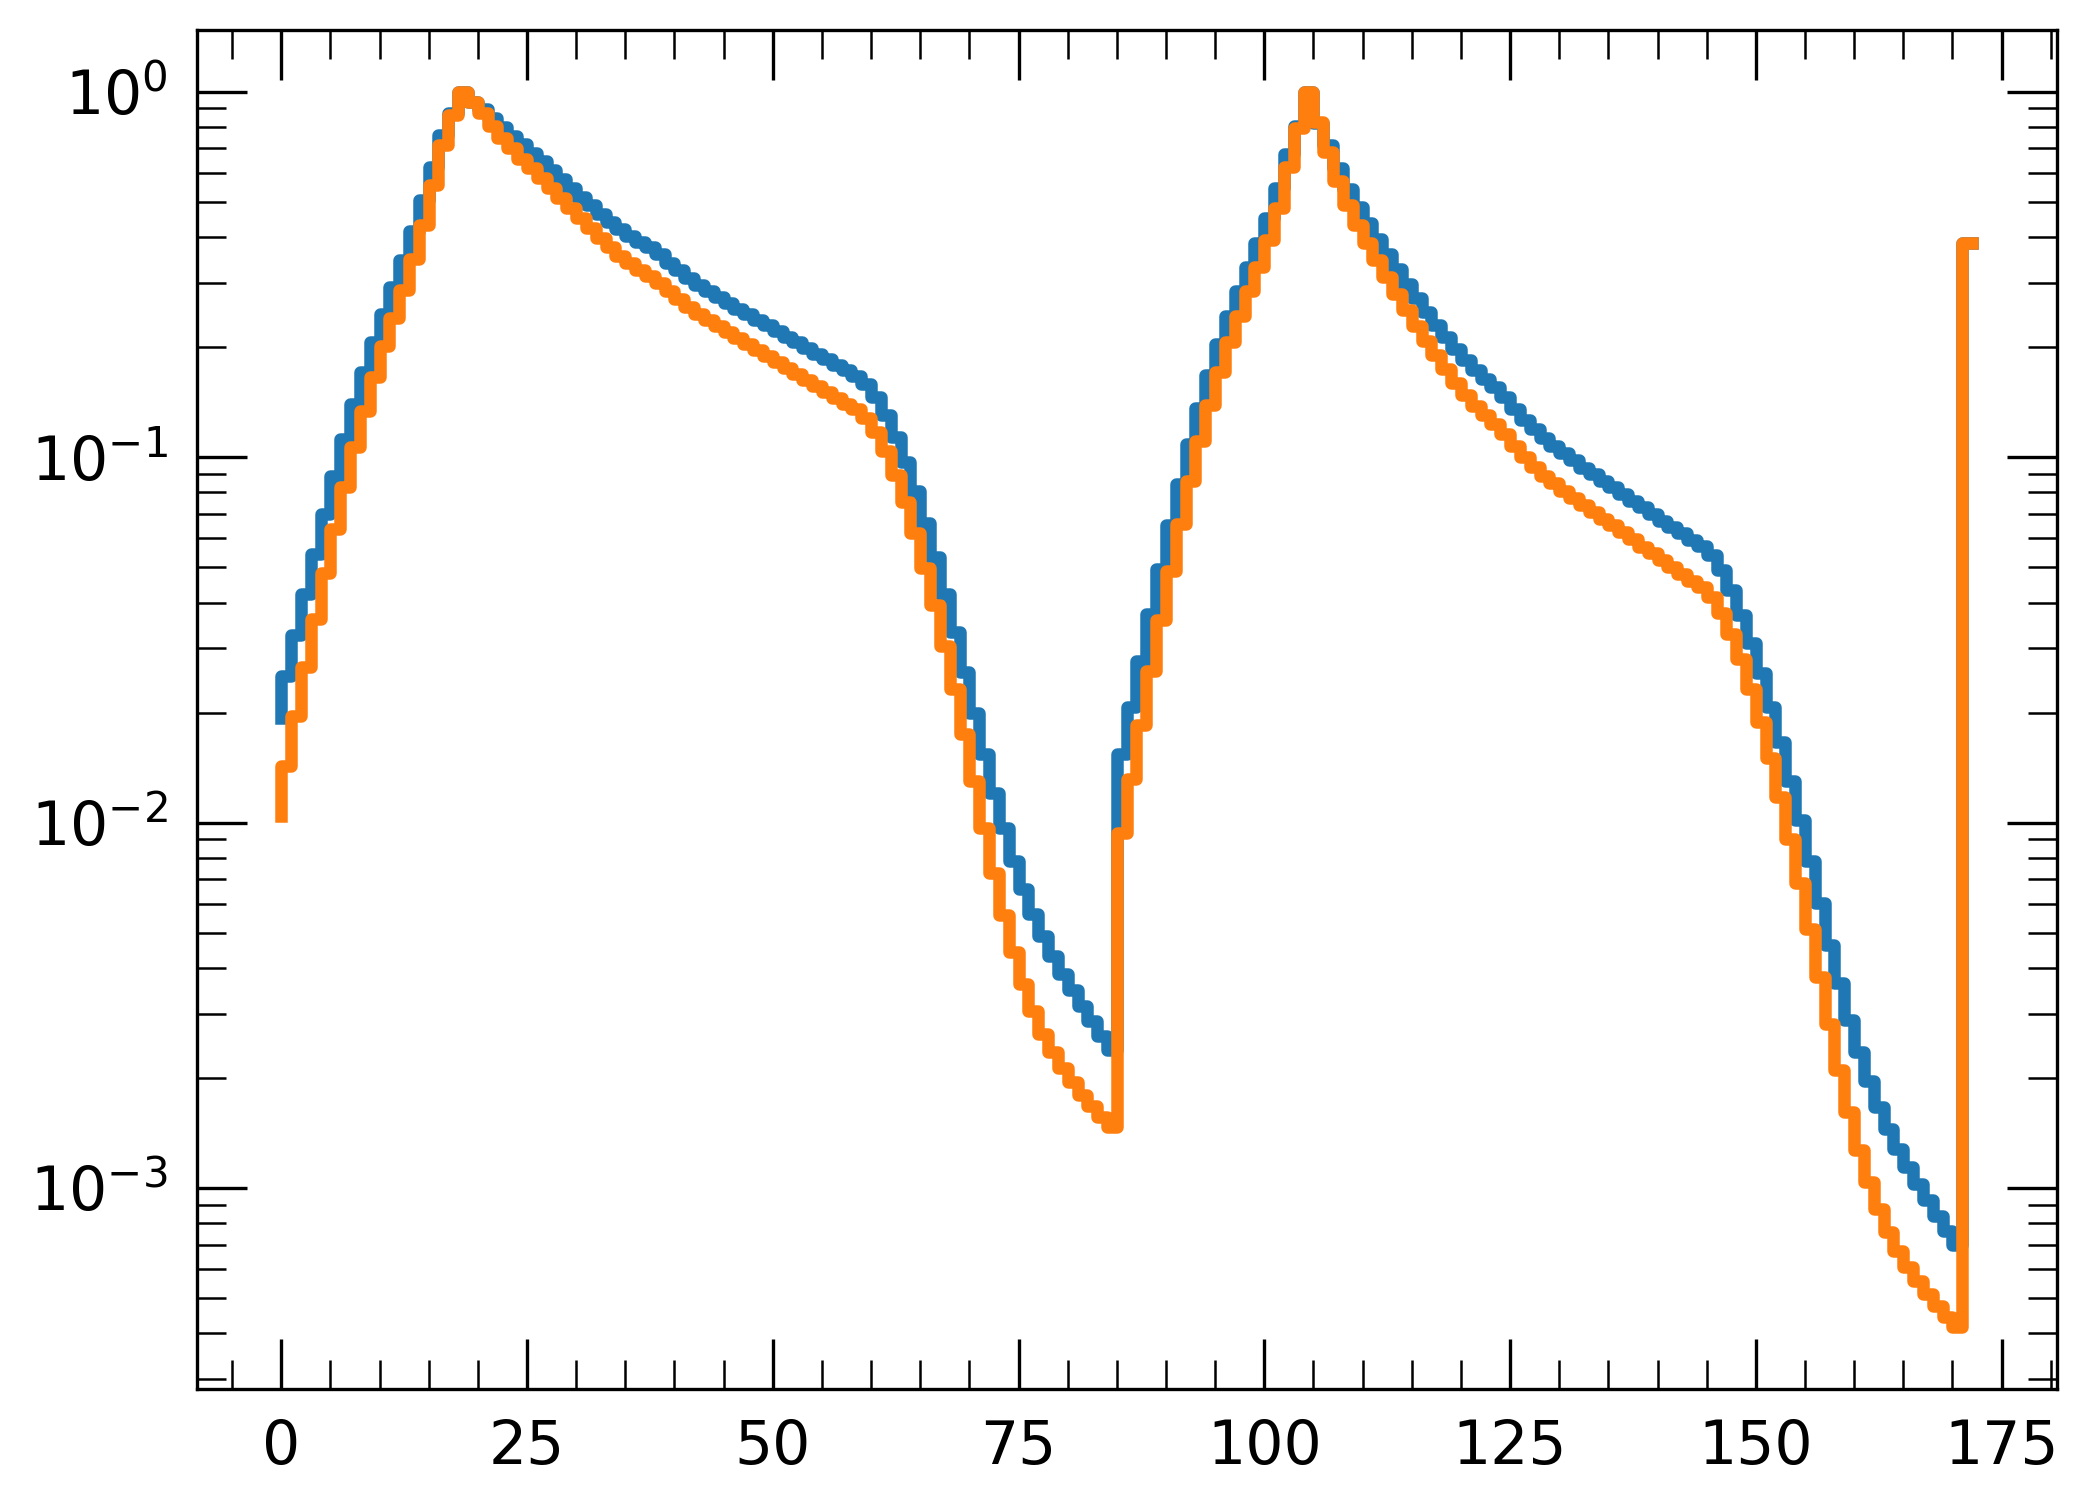

In [57]:
for key, h_time in dir_h_time_mean_concat.items():
    v_constant_bin_width = np.concatenate([np.diff(bins)*np.max(h_time[:len(bins)-1]/np.diff(bins) ),
                                           np.diff(bins)*np.max(h_time[len(bins)-1:-1]/np.diff(bins)), [17.5**3]])
    plt.step(range(len(h_time)),h_time/v_constant_bin_width,label=key)
plt.semilogy()

# TMVA Results

dict_keys(['fileid', 'evtID', 'eleID', 'Eqe', 'r3', 'r_xy', 'zz', 'r3_true', 'h_time_without_charge', 'h_time_with_charge', 'tag', 'PSD'])
Cannot get dir_n_samples!!! You need to set it by hand !!Continue
Cannot get dir_train!!! You need to set it by hand !!Continue


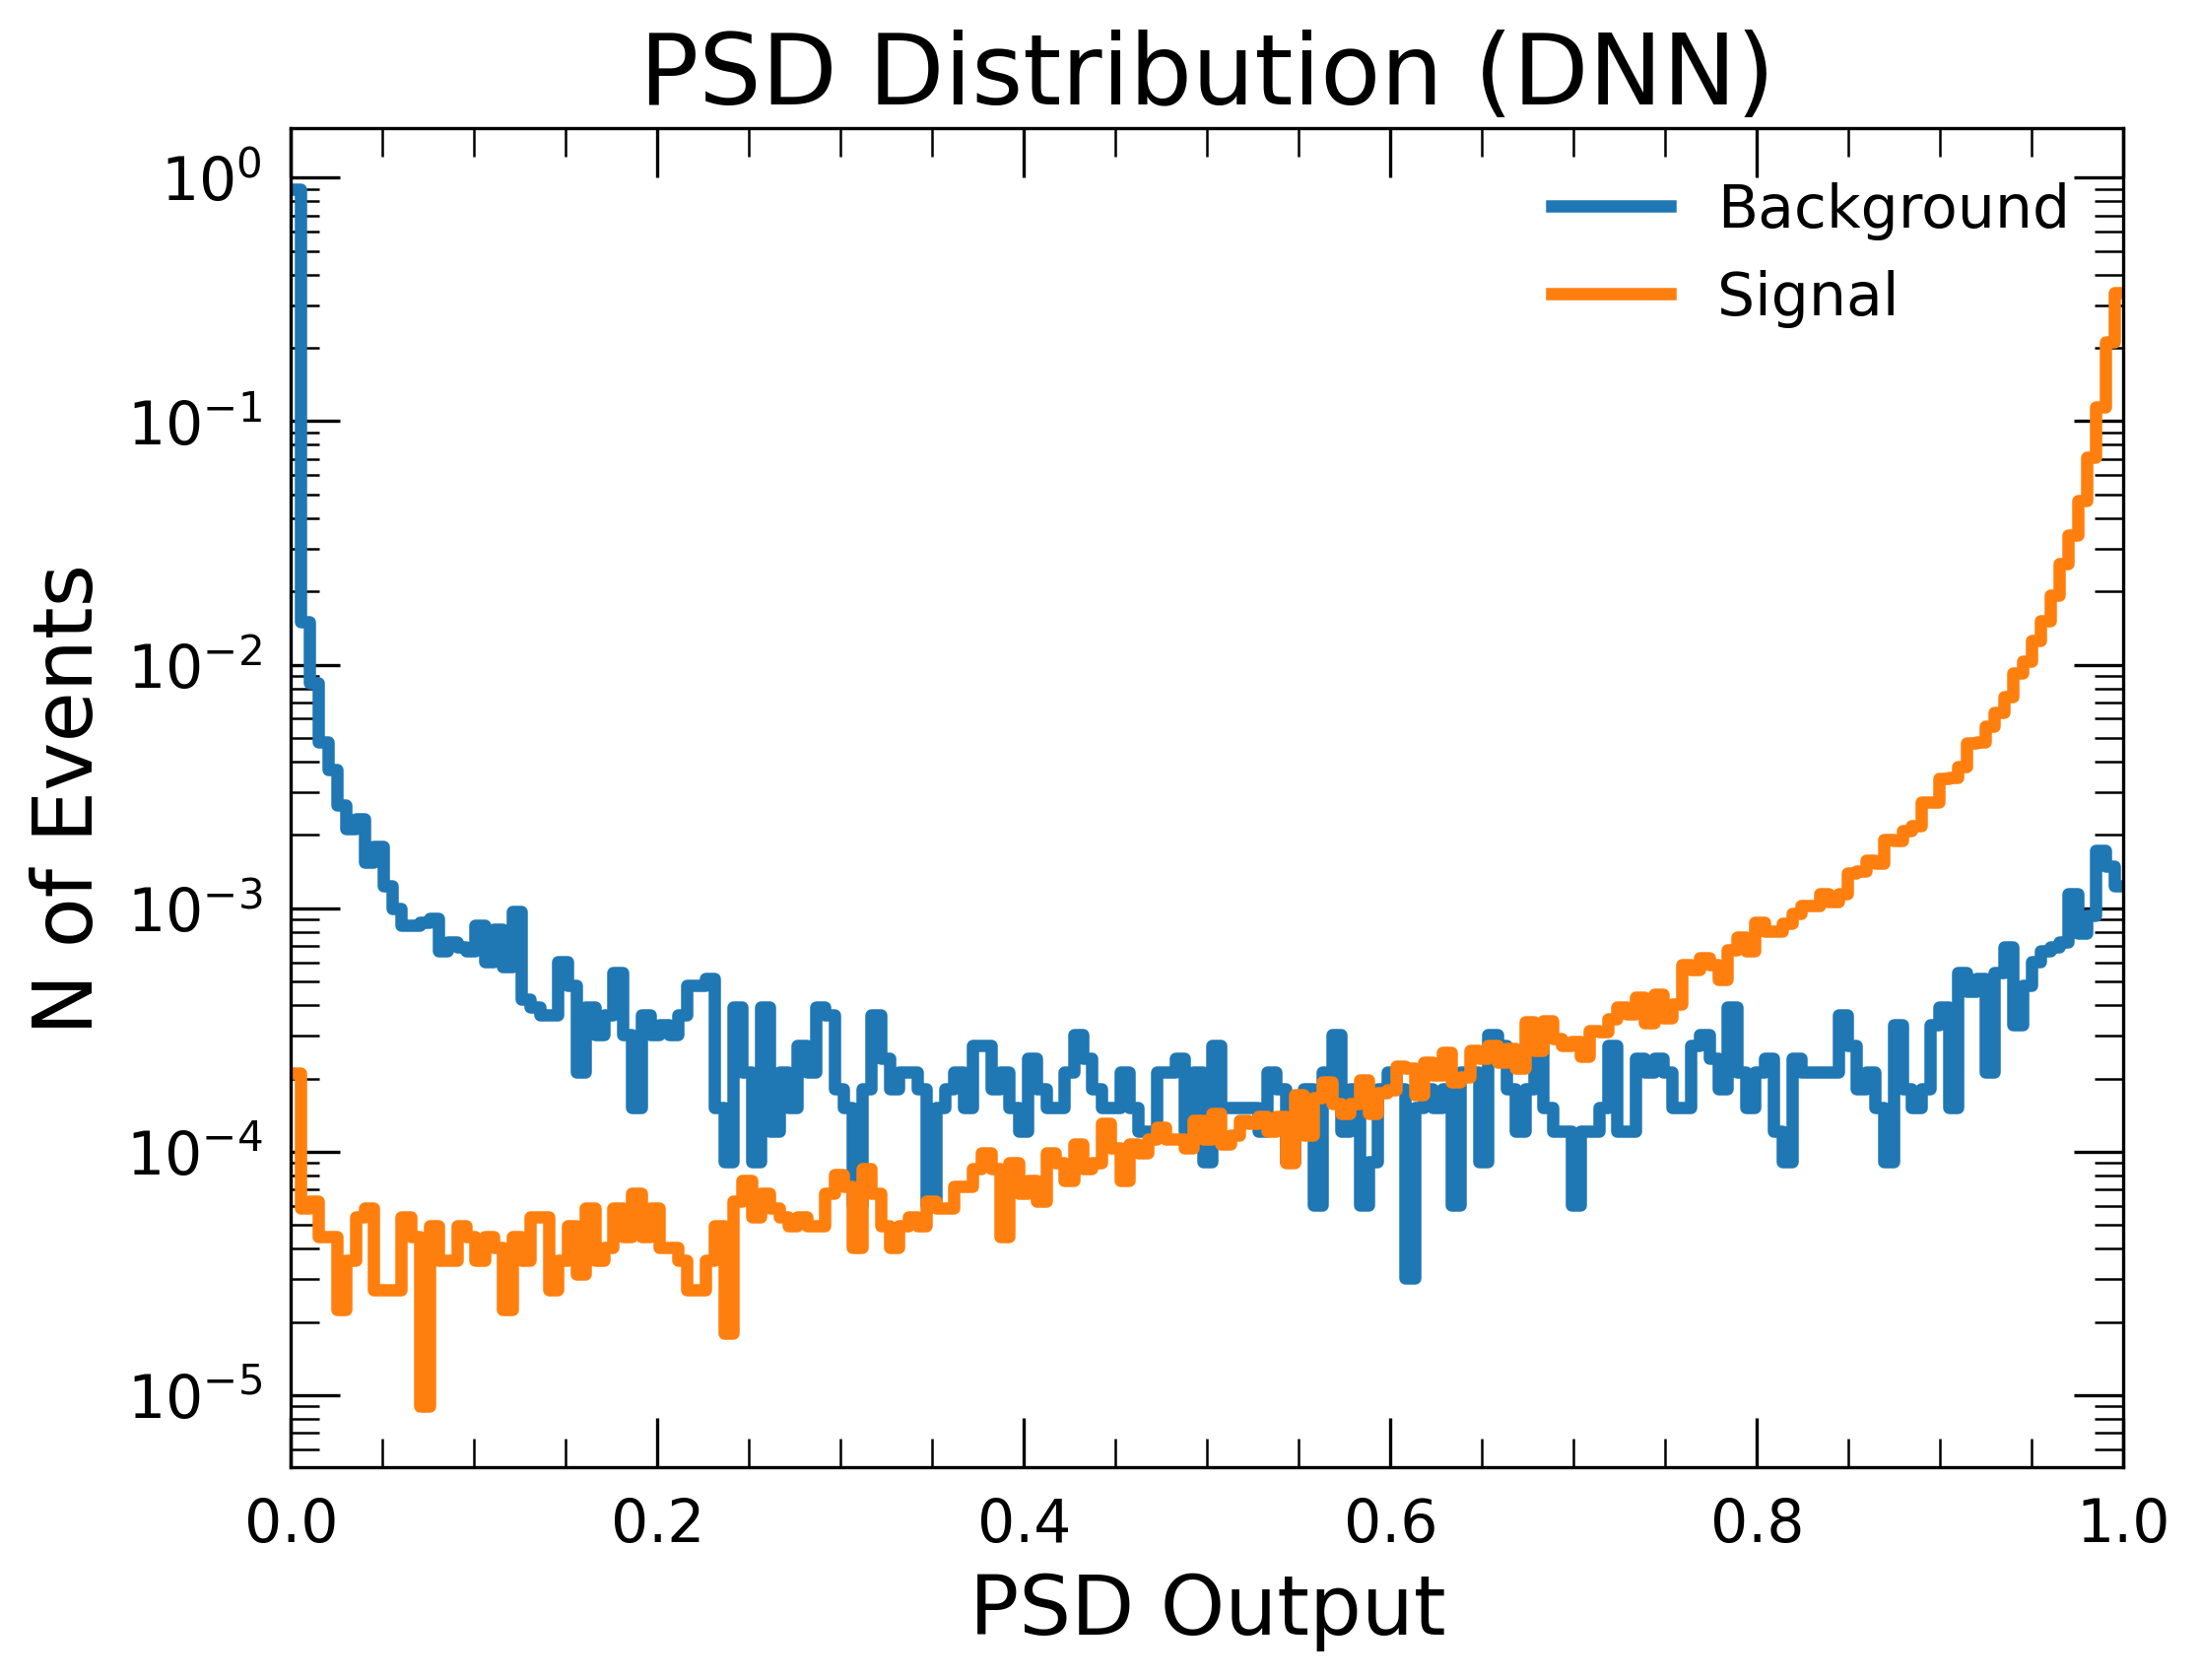

<Figure size 2400x1800 with 0 Axes>

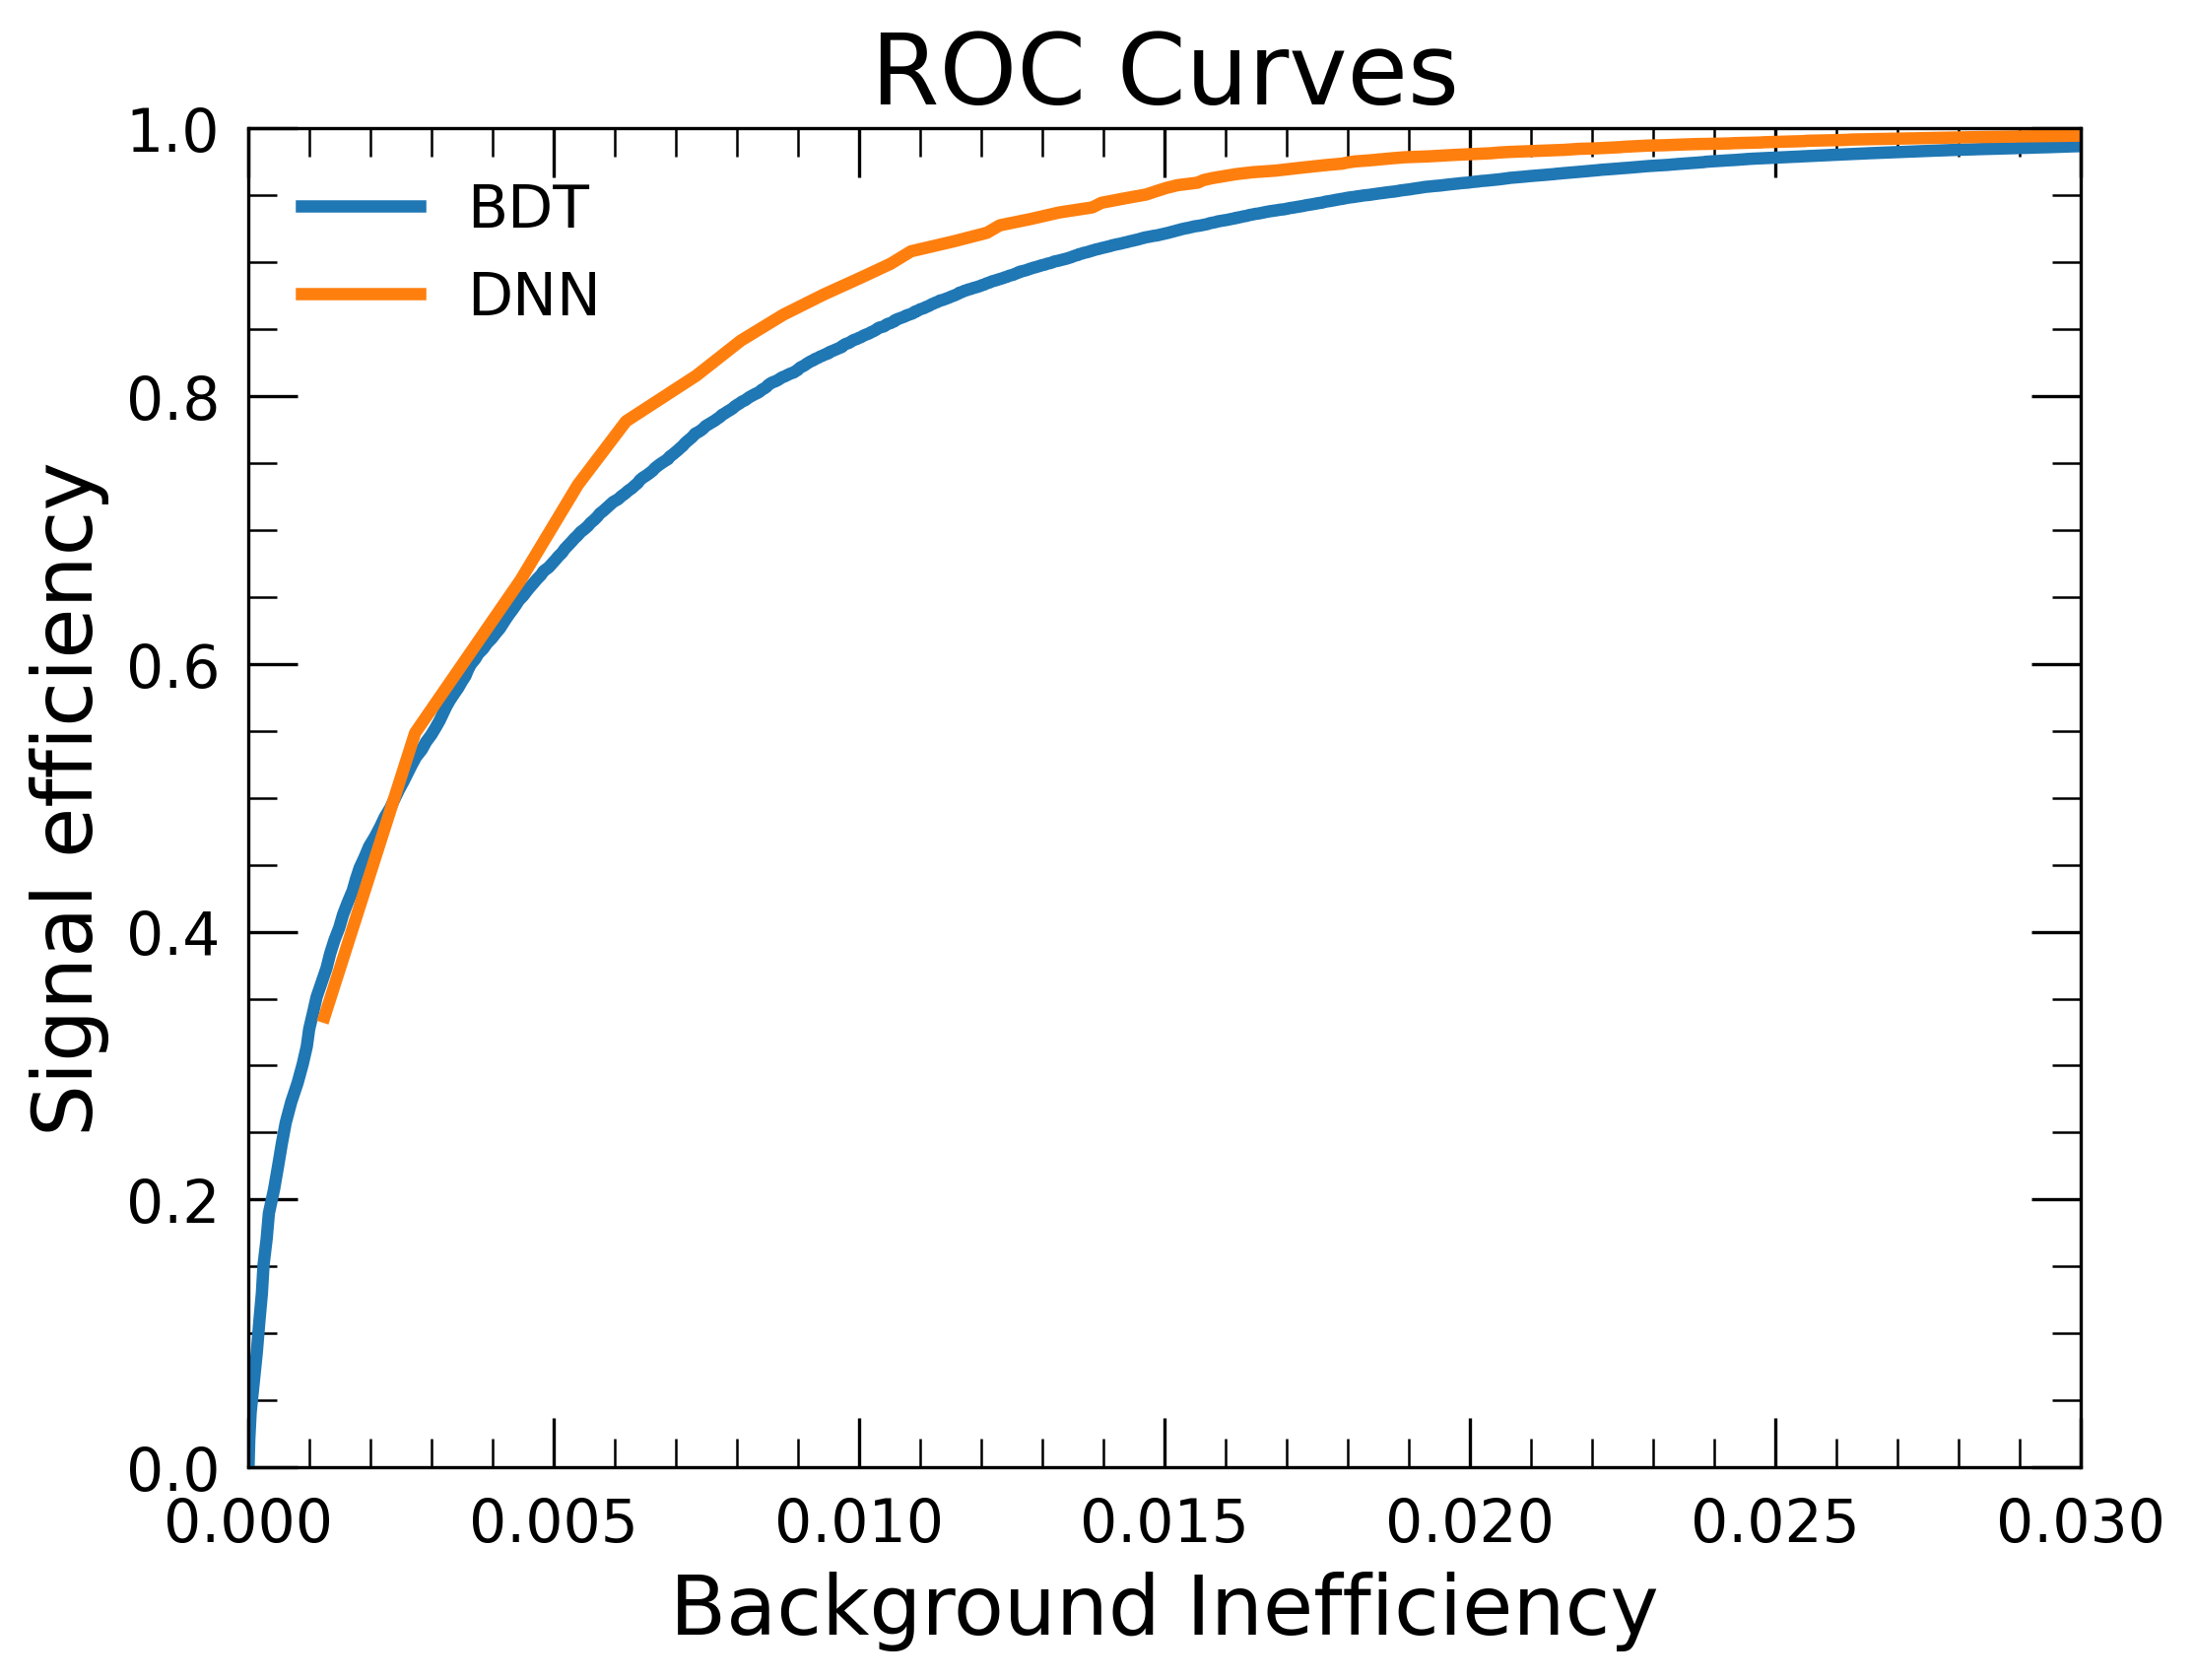

In [60]:
from importlib import reload
import DiscriminationTools
import HistTools
reload(HistTools)
reload(DiscriminationTools)
from DiscriminationTools import DiscriminationTools
from HistTools import PlotHistNormByHits
discrimination_tool = DiscriminationTools()
discrimination_tool.key_Energy = "Eqe"
discrimination_tool.key_tag = "tag"
discrimination_tool.GetPredictionData("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_PSDTools/predict_Combine.npz")
discrimination_tool.GetPSDDistribution(bins=np.linspace(0, 1, 200), title_options=" (DNN)")
plt.figure()
import uproot as up
with up.open("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/results_TMVA_chengjie/output_hist_fv1_all.root") as f:
    bkg_ineff, sig_eff =  f["XncYdsnb_eff"].values()

ax = plt.subplot(111)
ax.plot( bkg_ineff, sig_eff, label="BDT")

discrimination_tool.PlotROCCurves(xlim=(0,0.03), ylim=(0,1), label="DNN", ax=ax)

In [59]:
print(dir_events["tag"])

[0 0 0 ... 1 1 1]
